<a href="https://colab.research.google.com/github/PabloGP10/valores-atipicos/blob/main/6__Regresion_lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


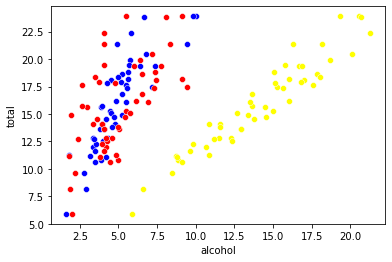

In [3]:
#Se grafican mapas de dispersion de las variables 3 ariables 'alcohol','speeding' y 'no previous'
from turtle import color
sns.scatterplot(x='alcohol',y='total',color='blue',data=df)
sns.scatterplot(x='speeding',y='total',color='red',data=df)
sns.scatterplot(x='no_previous',y='total',color='yellow',data=df)

In [5]:
#Declaramos las variables dependientes (y) e independientes (x) paara la regresion lineal
Vars_Indep=df[['alcohol','speeding','no_previous']]
Var_Dep=df['total']

In [7]:
#Se define model como la función de regresion lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
#Verificmaos la funcion relacionada al modelo
type(model)

In [9]:
#Ajustamos el modelocon las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [20]:
#Verificamos los coeficientes obtenidos para el modeloajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol', 'speeding', 'no_previous'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.62534291, 0.01978015, 0.81582765]),
 '_residues': 49.24297716752276,
 'rank_': 3,
 'singular_': array([29.90574925, 11.29147728,  6.31241828]),
 'intercept_': 1.2098448339476615}

In [ ]:
#Eavluamos la eficiencia del modelo obtendio por eido del coeficiene R determinación
model.score(Vars_Indep,Var_Dep)

**Modelo Predictivo**

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: alcohol,
y_pred=model.predict(X=df[['alcohol','speeding','no_previous']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el dataframe
df.insert(0,'Predicciones',y_pred)
df

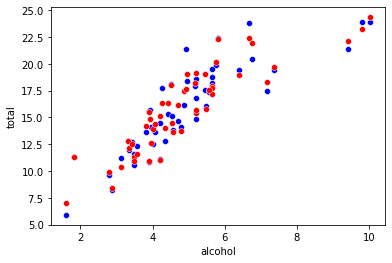

In [17]:
#visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='alcohol',y='total',color='blue',data=df)
sns.scatterplot(x='alcohol',y='Predicciones',color='red',data=df)
#sns.lineplot(x='alcohol',y='Predicciones',color='yellow',data=df)

In [18]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.9420360646171964

In [19]:
#Coroboramos cuel es el coeficiente de corrrelacion de nuestro modelo
coef_correl=np.sqrt(coef_Deter)
coef_correl

0.9705854236579057